# Построение модели линейной одномерной регрессии

**Вариант:** 14

**Цель работы:** изучение принципов построения модели линейной одномерной регрессии.

**Задачи:**
* реализовать каонвейер для выполнения всех стадий обработки данных при решении задачи одномерной регрессии;
* получение теоретических представлений о задаче регресии;
* получение навыков использования пайплайна при решении задачи машинного обучения;
* получение навыков рефакторинга кода в задачах машинного обучения.

## Объем продаж

Мной был выбран набор данных под названием "Sales" по ссылке https://www.kaggle.com/datasets/nadezhda2019/sales. Эти данные являются результатом анализа объема продаж (SALES) в магазине по объему рекламы (ADV) и цены батончика (PRICE).

### Подключение библиотек

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Загрузка данных и разделение на матрицу признаков и зависимую переменную

In [154]:
dataset_1 = pd.read_csv('./datasets/sales.csv')
dataset_1.head()

,SALES,PRICE,ADV
0,4141,59,200
1,3842,59,200
2,3056,59,200
3,3519,59,200
4,4226,59,400


В данном наборе указано всего 3 цены батончика: 59, 79 и 99. Таким же образом, есть только 3 цены рекламы: 200, 400 и 600. Поэтому в данном случае введем новую переменную coeff, высчитывающий коеффициент деления значения из столбца ADV на соответсвующее значение столбца PRICE. Сразу заметим, что при одинаковых значениях двух этих столбцов, значения в столбце SALES меняются, соответсвенно при одном и том же значении из столбца coeff параметр SALES будет разным, а значит и график будет достаточно "некрасивым".

In [155]:
import pandas as pd

dataset = pd.read_csv('./datasets/sales.csv')

dataset['coeff'] = dataset['ADV'] / dataset['PRICE']

# Просмотрим измененный набор данных
dataset.head()


,SALES,PRICE,ADV,coeff
0,4141,59,200,3.389831
1,3842,59,200,3.389831
2,3056,59,200,3.389831
3,3519,59,200,3.389831
4,4226,59,400,6.779661


In [156]:
X = dataset.iloc[:, 3:4].values
y = dataset.iloc[:, 0].values
print ("Матрица признаков"); print(X[:24])
print ("Зависимая переменная"); print(y[:24])

# на данном примере будем наблюдать изменение объема продаж в зависимости от 
# объема рекламы для батончика, стоимость которого 59 и 79 денежных единиц

Матрица признаков
[[ 3.38983051]
 [ 3.38983051]
 [ 3.38983051]
 [ 3.38983051]
 [ 6.77966102]
 [ 6.77966102]
 [ 6.77966102]
 [ 6.77966102]
 [10.16949153]
 [10.16949153]
 [10.16949153]
 [10.16949153]
 [ 2.53164557]
 [ 2.53164557]
 [ 2.53164557]
 [ 2.53164557]
 [ 5.06329114]
 [ 5.06329114]
 [ 5.06329114]
 [ 5.06329114]
 [ 7.59493671]
 [ 7.59493671]
 [ 7.59493671]
 [ 7.59493671]]
Зависимая переменная
[4141 3842 3056 3519 4226 4630 3507 3754 5000 5120 4011 5015 1916  675
 3636 3224 2295 2730 2618 4421 4113 3746 3532 3825]


### Разделение выборки на тестовую и тренировочную

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0) 

### Обучение линейной модели регрессии

In [158]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Предсказание, обработка и визуализация результатов

In [159]:
y_pred = regressor.predict(X_test)
print(y_pred)

[5000.27503286 4068.94118161 2052.30549225 3153.12956121 2547.7625579
 2052.30549225 2783.10466408 3153.12956121 5000.27503286]


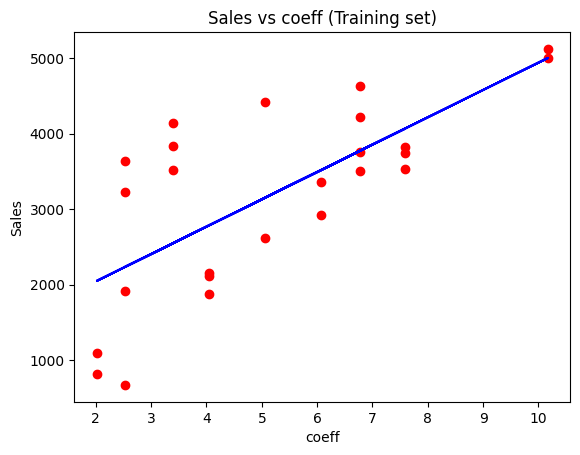

In [160]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Sales vs coeff (Training set)')
plt.xlabel('coeff')
plt.ylabel('Sales')
plt.show()

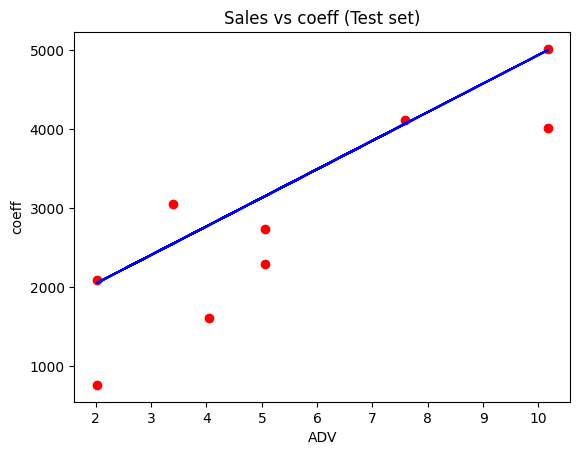

In [161]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Sales vs coeff (Test set)')
plt.xlabel('ADV')
plt.ylabel('coeff')
plt.show()

### Использование модели

In [162]:
coeff = [[6.77966102]]

regressor.predict(coeff)

array([3774.01879648])

### Параметры модели

In [163]:
a = regressor.coef_
b = regressor.intercept_

In [164]:
coeff = 6.77966102


SALES  = a * coeff + b 
SALES

array([3774.01879648])

## Контольные вопросы

1. Почему при реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков?

При реализации модели линейной регрессии нет необходимости выполнять масштабирование признаков, потому что эта модель основана на линейной комбинации признаков. Масштабирование признаков полезно в моделях, которые основаны на расстояниях или различиях между признаками, как, например, метод k-ближайших соседей (KNN) или метод опорных векторов (SVM). В случае линейной регрессии, коэффициенты регрессии адаптируются к значениям признаков, включая их масштаб, поэтому масштабирование не является обязательным.

2. Почему при реализации модели линейной регрессии в качестве функции потерь используется квадратичное отклонение, а не модуль отклонения?

Модель линейной регрессии использует квадратичное отклонение (Mean Squared Error, MSE) в качестве функции потерь, а не модуль отклонения (Mean Absolute Error, MAE), потому что квадратичное отклонение более подходит для задачи обучения с учителем и линейной регрессии. Квадратичное отклонение считает большие ошибки более пагубными, чем маленькие, и эта функция потерь имеет аналитическое решение, что делает ее вычисление более эффективным.

3. Что именно реализовано в методе fit(X, y) класса LinearRegression?

Метод `fit(X, y)` класса LinearRegression реализует процесс обучения модели. Внутри метода выполняется нахождение оптимальных весов (коэффициентов) модели, которые минимизируют функцию потерь (как правило, MSE) на предоставленных обучающих данных `X` и соответствующих метках `y`. Модель подбирает коэффициенты так, чтобы аппроксимировать линейную зависимость между признаками и метками в данных.

4. Поясните назначение метода predict класса LinearRegression.

Метод `predict(X)` класса LinearRegression предназначен для выполнения прогнозов на новых данных. После обучения модели при помощи метода `fit`, вы можете использовать метод `predict` для предсказания значений целевой переменной на новых или тестовых данных, передавая их в качестве аргумента `X`. Модель применяет найденные веса к переданным данным и возвращает прогнозы.

5. По какой подвыборке необходимо оценивать точность модели машинного обучения: тестовой или тренировочной?

Для оценки точности модели машинного обучения обычно используют тестовую выборку, а не тренировочную. Тестовая выборка представляет собой данные, которые модель ранее не видела, и, следовательно, оценка точности на тестовой выборке дает более объективную оценку способности модели к обобщению. Оценка точности на тренировочной выборке может дать завышенные результаты, так как модель уже знакома с этими данными. Тестовая выборка позволяет проверить, насколько хорошо модель обобщает знания, полученные на тренировочных данных, на новые, неизвестные данные.